# **TRABAJO FINAL. GRUPO 02.**
# **"Predicción de Precios de Acciones de Google utilizando Regresión Lineal y Redes Neuronales Recurrentes: Un Enfoque de Minería de Datos"**

 *Ignacio de Lecea, Santiago Figueroa, Diego Hermana y Carla López.*

 *Ingeniería Matemática 3ºB*


## **INTRODUCCIÓN**

La predicción de precios de acciones es un área de investigación que puede resultar crucial en el ámbito financiero, donde la capacidad de anticipar las tendencias del mercado puede tener un impacto significativo en las decisiones de inversión. Sin embargo, ¿es esto posible?

En este proyecto, nos centramos en la aplicación de técnicas de minería de datos para estudiar los precios de las acciones de Google, utilizando tanto redes neuronales recurrentes (RNN) como regresión lineal. A través del análisis de datos históricos de precios de acciones, buscamos desarrollar modelos de observación que puedan ofrecer información a inversores y analistas financieros.

Nuestro objetivo, aparte de estudiar los precios de las acciones de Google, es la comparación de los distintos métodos estudiados en clase para determinar cuál es más veraz.

## **DEFINICIÓN DEL PROBLEMA**

El problema abordado en este proyecto se centra en la predicción de los precios de las acciones de Google en Enero de 2017, empleando como base de datos los precios desde 2012-2016. Dada la volatilidad inherente del mercado de valores y la influencia de una multitud de factores, como noticias económicas, condiciones del mercado y eventos geopolíticos, predecir con precisión los movimientos de los precios de las acciones es un desafío sin resolver. Sin embargo, mediante el uso de técnicas de minería de datos, podemos identificar patrones y tendencias que saquen valor a los datos.

## **ANÁLISIS DE PROBLEMAS**

Aunque pueda parecer factible predecir el precio de las acciones, es un desafío extremadamente ambicioso y prácticamente aleatorio debido a la volatilidad de los precios y a la multitud de factores que influyen en ellos, especialmente en grandes compañías como Google. A continuación, algunas razones por las cuales este estudio se centrará únicamente en el comportamiento y no en la predicción:

1. Condiciones económicas: Las fluctuaciones económicas, como las recesiones y los booms, afectan significativamente los precios de las acciones. Factores como el desempleo y la inflación complican nuestras predicciones añadiendo ruido a los datos.

2. Políticas gubernamentales: Las decisiones políticas, como cambios en las regulaciones fiscales y políticas monetarias, tienen una influencia directa en el mercado bursátil.

3. Demografía: Cambios demográficos, como el envejecimiento de la población o variaciones en la tasa de natalidad, pueden influir en las tendencias de consumo y, por ende, en los datos financieros.

4. Condiciones globales: Factores globales como conflictos internacionales, pandemias y desastres naturales pueden tener un impacto significativo e inesperado en los mercados financieros. Estos eventos son difíciles de prever y pueden causar perturbaciones generales en los modelos de predicción.

5. Sobreajuste a datos históricos: Es extremadamente complicado, por no decir imposible, encontrar bases de datos actualizadas al momento. Por esta razón, nuestro modelo no está preparado para validar y asegurar inversiones.

## **RESOLUCIÓN DEL PROBLEMA**

**MODELO DE GSP**

Para comenzar, realizaremos el método de GSP (Generalized Sequential Pattern) con el que podremos analizar patrones secuenciales y posteriormente estudiar si relevancia.

In [6]:
!pip install prefixspan
from prefixspan import PrefixSpan
import pandas as pd

# Crear un DataFrame con los precios de las acciones
datasetTraining = pd.read_csv('Google_Stock_Price_Train.csv')
prices = datasetTraining['Open'].values.tolist()

# Convertir los precios a una lista de listas (secuencia de transacciones)
transactions = [[price] for price in prices]

# Ejecutar el algoritmo GSP
patterns = PrefixSpan(transactions).frequent(2)

# Imprimir los patrones encontrados
print("Patrones frecuentes encontrados para Precio de Salida:")
for pattern in patterns:
    print(pattern)


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for prefixspan: filename=prefixspan-0.5.2-py3-none-any.whl size=11221 sha256=309b20d7f8f5c64d953f3cdc02200182419f7030bcfcc56ca58f7072ce087ab1
  Stored in directory: /root/.cache/pip/wheels/bf/96/ee/9e087a6d0d3163ee363c069bf80eaa4ca4f5ee51f2b2b0521c
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=2b03eacd02eb0ac825cdedce02ec4457e65654a5f4277a10223bf60d16e5abd0
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for extratools: filename=extratools-0.8.2.1-py3-none-any.whl size=28866 sha256=4af76badc499d26174c98421834fabfb1dbe2d9e98a16fe3c7ca69e7ea06695f
  Stored in directory: /root/.cache/pip/wheels/70/f3/03/3a98db17111f679c3291413b81d2a1e6e1bad5a3441175ace7
Successfully built prefixspan docopt extratools
Patrones frecuentes encontrados para

In [7]:
# Crear un DataFrame con los precios de las acciones
datasetTraining = pd.read_csv('Google_Stock_Price_Train.csv')
prices = datasetTraining['Close'].values.tolist()

# Convertir los precios a una lista de listas (secuencia de transacciones)
transactions = [[price] for price in prices]

# Ejecutar el algoritmo GSP
patterns = PrefixSpan(transactions).frequent(2)

# Imprimir los patrones encontrados
print("Patrones frecuentes encontrados para Precio de Cierre:")
for pattern in patterns:
    print(pattern)

Patrones frecuentes encontrados para Precio de Cierre:
(2, ['644.28'])
(2, ['759.69'])
(2, ['718.81'])
(2, ['721.27'])
(2, ['736.1'])
(2, ['751.61'])
(2, ['783.22'])
(2, ['553.38'])
(2, ['573.7'])
(2, ['570.03'])
(2, ['532.34'])
(2, ['538.22'])
(2, ['536.69'])
(2, ['629.25'])
(2, ['747.77'])
(2, ['697.77'])
(2, ['772.15'])


**MODELO CON APRIORI**

A continuación, usaremos el algoritmo Apriori, que permite identificar patrones frecuentes y asociaciones dentro de estas categorías para obtener una comprensión estructurada y clara del comportamiento de los precios de las acciones. Además, este algoritmo cuenta con muchas ventajas, ya que es muy flexible a la hora del ajuste de umbrales y la interpretación de resultados, lo que es particularmente valioso en el análisis de este tipo de datos financieros tan complejos.

In [8]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Convertir los precios de las acciones en transacciones
def categorize(price):
    if price < 300:
        return 'Low'
    elif 300 <= price < 500:
        return 'Medium'
    else:
        return 'High'

# Categorización
transactions = datasetTraining['Open'].apply(categorize).values.tolist()
transactions = [[price] for price in transactions]

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apriori
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

# Generar reglas de asociación
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Imprimir los conjuntos frecuentes y las reglas de asociación
print("Conjuntos frecuentes encontrados:")
print(frequent_itemsets)

print("\nReglas de asociación encontradas:")
print(rules)


Conjuntos frecuentes encontrados:
    support  itemsets
0  0.635135    (High)
1  0.317965  (Medium)

Reglas de asociación encontradas:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


Los resultados obtenidos muestran una prevalencia en las categorías "High" y "Medium" de los precios de apertura de las acciones, pero no revelan asociaciones entre estas categorías de precios. Esto refleja la naturaleza volátil de este mercado de valores, tal y como hemos explicado anteriormente y como comprobaremos a lo largo del proyecto.

**MODELO CON PCA**

PCA es un modelo que se utiliza para reducir la dimensionalidad de un dataset y así simplificar la modelización posterior. Es decir, encontrar un
subconjunto de los atributos originales que permita obtener modelos de la misma calidad que los que se obtendrían utilizando todos los atributos, para que de esta manera podamos identificar las principales fuentes de variación en los datos de precios de acciones.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


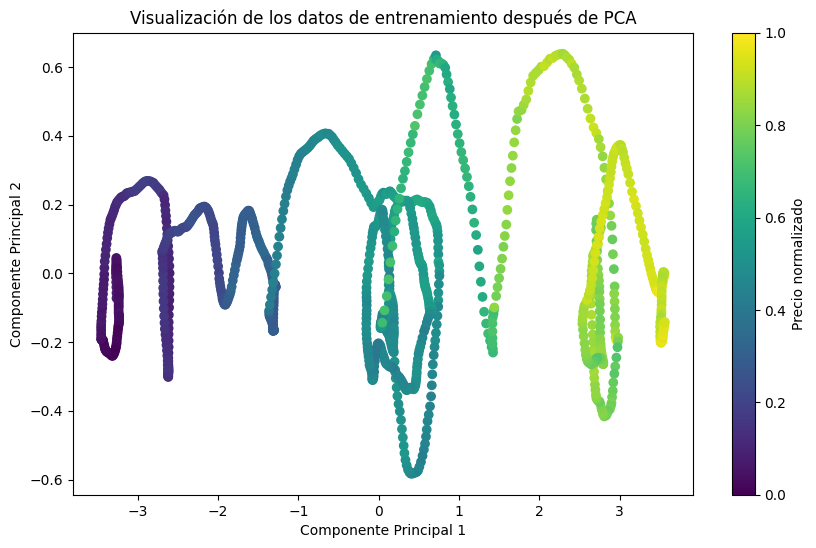

In [9]:
# 1 - Preprocesamiento de los datos

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Obtenemos el precio real de las acciones entre 2012 y 2016
datasetTraining = pd.read_csv('Google_Stock_Price_Train.csv')
trainingSet = datasetTraining.iloc[:, 1:2].values

# Normalización
sc = MinMaxScaler(feature_range=(0, 1))
trainingSetScaled = sc.fit_transform(trainingSet)

# Estructura de datos con 60 pasos de tiempo y 1 salida
xTrain = []
yTrain = []
for i in range(60, 1258):
    xTrain.append(trainingSetScaled[i-60:i, 0])
    yTrain.append(trainingSetScaled[i, 0])
xTrain, yTrain = np.array(xTrain), np.array(yTrain)

# Reconfiguración
xTrain = np.reshape(xTrain, (xTrain.shape[0], xTrain.shape[1], 1))

# 2 - Aplicar PCA
from sklearn.decomposition import PCA

# Redimensionar xTrain para PCA
xTrain_reshaped = xTrain.reshape(-1, 60)

# Aplicar PCA
pca = PCA(n_components=2)  # Elegimos 2 componentes principales para la visualización
xTrain_pca = pca.fit_transform(xTrain_reshaped)

# 3 - Visualización de las dos primeras componentes principales
plt.figure(figsize=(10, 6))
plt.scatter(xTrain_pca[:, 0], xTrain_pca[:, 1], c=yTrain, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de los datos de entrenamiento después de PCA')
plt.colorbar(label='Precio normalizado')
plt.show()


Parece que utilizando 2 componentes principales, estamos capturando la variabilidad de los datos por completo ya que no hay patrones evidentes fuera de los límites dados de los componentes principales.

Por otro lado, a parte de observar cierta ciclicidad que veremos en los resultados, notamos que los puntos más altos en el eje del Componente Principal 1 tienden a estar asociados con precios normalizados más altos, que son aquellos que se corresponde con los colores más claros.

**MODELO CLÚSTER CON PCA**

A parte de poder reducir la dimensionalidad como hemos heco con el PCA, podría resultar valioso para identificar patrones y tendencias generales en el comportamiento de las acciones.

Podemos considerarlo como una continuación del apartado anterior por lo que cogeremos los datos procesados según el PCA anterior.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


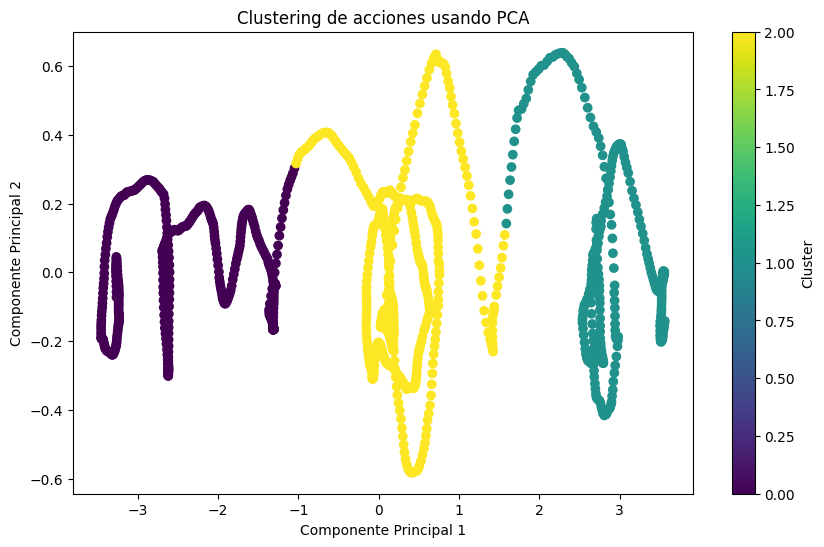

In [13]:
from sklearn.cluster import KMeans

# Aplicar K-means clustering
kmeans = KMeans(n_clusters=3)  # Asumiendo 3 clusters, ajustar según necesidad
clusters = kmeans.fit_predict(xTrain_pca)

# Visualización
plt.figure(figsize=(10, 6))
plt.scatter(xTrain_pca[:, 0], xTrain_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clustering de acciones usando PCA')
plt.colorbar(label='Cluster')
plt.show()



La agrupación de los precios de las acciones con KMeans y PCA de esta manera podría tener sentido y no ser simplemente un artefacto de la volatilidad. Sin embargo, como hemos mencionado anteriormente, para dar un veredicto definitivo, es necesario realizar análisis adicionales y considerar el contexto del mercado y los factores externos que puedan estar influyendo en los precios, lo que hacen que el estudio se de a la aletoriedad.

**MODELO RNR**  

Las Redes Neuronales Recurrentes (RNN) son arquitecturas de redes neuronales utilizadas para procesar datos secuenciales, como series temporales o texto. Se destacan por su capacidad para capturar dependencias temporales en los datos, lo que las hace útiles en tareas como predicción de series temporales y procesamiento de lenguaje natural.  

### Paso 1.
Se recopilan y se preparan los datos históricos de precios de acciones de Google para su posterior análisis. La limpieza, la normalización y la preparación de los datos ya ha sido realizada con anterioridad, dado que es una base de datos obtenida de Kaggle.  

Para entrenar un modelo de RNN, necesitamos crear una estructura de datos adecuada. Se crea una estructura en forma de ventana deslizante con 60 pasos temporales anteriores (60 días en este caso) que almacene la información pertinente y el precio de apertura del día siguiente como la etiqueta de salida.

Es el mismo preprocesamiento que para PCA, por lo que no lo ejecutamos otra vez.


In [14]:
# 1 - Preprocesamiento de los datos

# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler

# # Obtenemos el precio real de las acciones entre 2012 y 2016
# datasetTraining = pd.read_csv('Google_Stock_Price_Train.csv')
# trainingSet = datasetTraining.iloc[:, 1:2].values

# # Normalización
# sc = MinMaxScaler(feature_range = (0, 1))
# trainingSetScaled = sc.fit_transform(trainingSet)

# # Estructura de datos con 60 pasos de tiempo y 1 salida
# xTrain = []
# yTrain = []
# for i in range(60, 1258):
#     xTrain.append(trainingSetScaled[i-60:i,0])
#     yTrain.append(trainingSetScaled[i, 0])
# xTrain, yTrain = np.array(xTrain), np.array(yTrain)

# # Reconfiguración
# xTrain = np.reshape(xTrain, (xTrain.shape[0], xTrain.shape[1], 1))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Paso 2.

El modelo consta de capas LSTM (Long Short-Term Memory) para capturar patrones secuenciales en los datos de series temporales.
Se inicializa el modelo de RNN utilizando Sequential(), que es una forma secuencial de agregar capas al modelo. Esto significa que las capas se apilan una encima de la otra en secuencia. Para nuestro modelo, agregamos cuatro capas LSTM. Cada capa LSTM tiene 60 unidades (neuronas) y devuelve secuencias completas.

También se agrega regularización por Dropout, eliminación de neuronas en las capas de la red neuronal en base a la probabilidad dada por la distribución de Bernoulli, con un valor de 0.2, lo que ayuda a prevenir el sobreajuste al apagar aleatoriamente un porcentaje de las unidades durante el entrenamiento.

In [15]:
# 2 - Construir el RNN

# Inicializar el RNN

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

# Añadimos la primera capa de RNN
regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (xTrain.shape[1], 1)))
regressor.add(Dropout(0.2))

# Segunda capa de RNN
regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.2))

# Tercera capa de RNN
regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.2))

# Cuarta capa de RNN
regressor.add(LSTM(units = 60))
regressor.add(Dropout(0.2))

# Capa del output
regressor.add(Dense(units = 1))

# Compilamos
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Ajustamos el RNN al Training set con validation split
regressor.fit(xTrain, yTrain, epochs = 100, batch_size = 16)
regressor.summary()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Epoch 1/100
75/75 [==============================] - 17s 106ms/step - loss: 0.0166
Epoch 2/100
75/75 [==============================] - 9s 126ms/step - loss: 0.0055
Epoch 3/100
75/75 [==============================] - 7s 98ms/step - loss: 0.0049
Epoch 4/100
75/75 [==============================] - 9s 116ms/step - loss: 0.0050
Epoch 5/100
75/75 [==============================] - 8s 109ms/step - loss: 0.0051
Epoch 6/100
75/75 [==============================] - 8s 110ms/step - loss: 0.0037
Epoch 7/100
75/75 [==============================] - 10s 130ms/step - loss: 0.0040
Epoch 8/100
75/75 [==============================] - 7s 99ms/step - loss: 0.0036
Epoch 9/100
75/75 [==============================] - 9s 119ms/step - loss: 0.0035
Epoch 10/100
75/75 [==============================] - 8s 110ms/step - loss: 0.0038
Epoch 11/100
75/75 [==============================] - 8s 111ms/step - loss: 0.0035
Epoch 12/100
75/75 [==============================] - 9s 120ms/step - loss: 0.0034
Epoch 13/100


### Paso 3.
Empleamos la validación cruzada para evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento, en este caso, se utiliza un validation_split del 20%. Eso es crucial para saber si el modelo esta "memorizando" los datos de entrenamiento y no generaliza bien en datos nuevos.  

El número de epochs que hemos empleado es 100, lo que determina cuántas veces el modelo verá el conjunto de datos completo, y es crucial para evitar el subajuste o el sobreajuste, con una batch size de 16, siendo el número de ejemplos que se pasan al algoritmo en cada iteración de aprendizaje. Tras varias pruebas hemos concluido que esta era la mejor configuración de nuestra RNN, ya que es con la que hemos obtenido el menor MSE.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1/1 [==============================] - 2s 2s/step


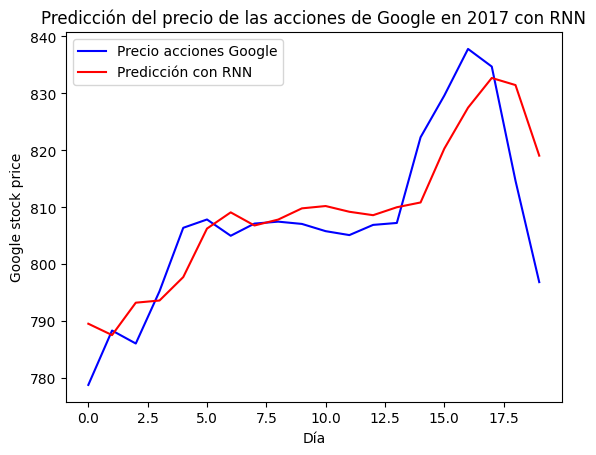

In [16]:
# 3 - Predicciones y visualización de los resultados

# Precio real en 2017
datasetTest = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = datasetTest.iloc[:, 1:2].values

# Predicción del precio de las acciones en 2017
entireDataset = pd.concat((datasetTraining['Open'], datasetTest['Open']), axis = 0)
inputs = entireDataset[len(entireDataset) - len(datasetTest) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
xTest = []
for i in range(60, 80):
    xTest.append(inputs[i-60:i, 0])
xTest = np.array(xTest)
xTest = np.reshape(xTest, (xTest.shape[0], xTest.shape[1], 1))
predicted_stock_price = regressor.predict(xTest)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


# Representación
plt.plot(real_stock_price, color = 'Blue', label = 'Precio acciones Google')
plt.plot(predicted_stock_price, color = 'Red', label = 'Predicción con RNN')
plt.title('Predicción del precio de las acciones de Google en 2017 con RNN')
plt.xlabel('Día')
plt.ylabel('Google stock price')
plt.legend()
plt.show()

### Paso 5.
Almacenamos las predicciones y las  comparamos con los datos reales. Por otro lado calculamos el MSE. Estas son las dos mediciones que usaremos para medir la precisión de nuestro modelo.

In [17]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(real_stock_price, predicted_stock_price)
print("Error cuadrático medio (RNN):", mse)

Error cuadrático medio (RNN): 71.1498805059808


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**MODELO REGRESIÓN LINEAL SIMPLE**  


Por otro lado, la regresión lineal es una técnica de modelado estadístico que se emplea para describir una variable de respuesta continua como una función de una o varias variables predictoras, asumiendo una relación lineal entre las variables independientes y la variable dependiente.  

Mientras que las RNN son ideales para capturar relaciones temporales complejas, la regresión lineal es más apropiada para problemas con relaciones lineales simples, es decir, teoricamente el método más efectivo para nuestro caso particular debería ser la RNN, dada la naturaleza compleja de los precios de las acciones.  

Realizaremos la predicción con el modelo de Regresión Lineal Simple de la siguiente manera:  

Ajustamos el modelo a los datos de entrenamiento utilizando el método fit(). Los datos de entrada se deben pasar en un formato de matriz bidimensional, creando ventanas temporales de 60 días como hemos hecho en la RNR. Durante el ajuste, el modelo calculará los coeficientes de regresión que mejor se ajusten a los datos de entrenamiento, utilizando el método de mínimos cuadrados ordinarios.

 Durante el ajuste, el modelo calculará los coeficientes de regresión que mejor se ajusten a los datos de entrenamiento, utilizando el método de mínimos cuadrados ordinarios.

In [27]:
# 1 - Construir el modelo de Regresión Lineal
from sklearn.linear_model import LinearRegression

# Inicializar el modelo
regressor = LinearRegression()

# Ajustar el modelo de Regresión Lineal al Training set
regressor.fit(xTrain.reshape(-1, 60), yTrain)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LinearRegression()

Igual que en la RNR, alamacenamos las predicciones y las comparamos con los valores reales; también calculamos el MSE, ambas como medidas de precisión.  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


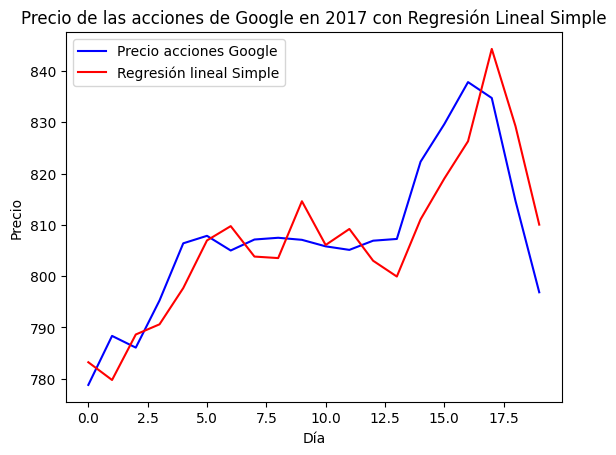

In [28]:
# 2- Predicciones y conclusión

# Precio real en 2017
real_stock_price = datasetTest.iloc[:, 1:2].values

# Predicción del precio de las acciones en 2017
entireDataset = pd.concat((datasetTraining['Open'], datasetTest['Open']), axis = 0)
inputs = entireDataset[len(entireDataset) - len(datasetTest) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
xTest = []
for i in range(60, 80):
    xTest.append(inputs[i-60:i, 0])
xTest = np.array(xTest)
xTest = np.reshape(xTest, (xTest.shape[0], xTest.shape[1], 1))
predicted_stock_price = regressor.predict(xTest.reshape(-1, 60))
predicted_stock_price = predicted_stock_price.reshape(-1, 1)
predicted_stock_price_descaled = sc.inverse_transform(predicted_stock_price)

# Representación
plt.plot(real_stock_price, color = 'Blue', label = 'Precio acciones Google')
plt.plot(predicted_stock_price_descaled, color = 'Red', label = 'Regresión lineal Simple')
plt.title('Precio de las acciones de Google en 2017 con Regresión Lineal Simple')
plt.xlabel('Día')
plt.ylabel('Precio')
plt.legend()
plt.show()

In [29]:
mse = mean_squared_error(real_stock_price, predicted_stock_price_descaled)
print("Mean Squared Error (Regresión Lineal Simple):", mse)

Mean Squared Error (Regresión Lineal Simple): 61.90894493207097


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**MODELO REGRESIÓN LINEAL MÚLTIPLE**

Por otro lado, estudiaremos el modelo mediante una Regresión Lineal Múltiple para poder comparar los resultados obtenidos en el simple.

Gracias al uso de este tipo de regresión, podremos representar la relación entre una variable dependiente y múltiples variables independientes al mismo tiempo. De esta manera, se puede capturar mejor la realidad en la que un resultado podría depender de muchas características a la vez, lo cual ayuda a predecir con mayor precisión y a entender realmente cómo se relacionan las diferentes variables entre sí.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Media de los coeficientes: [ 0.01202726  0.00434161  0.00010982 -0.00064307]
Intercepción (Beta0): 0.007073298543907369


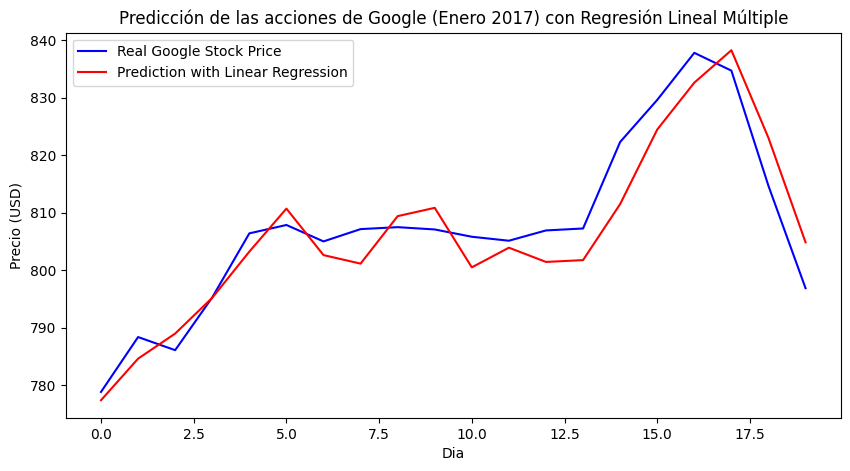

Mean Squared Error (Regresión Lineal Multiple): 25.438377469450323


In [30]:
# Función para convertir los datos en columnas
def clean_and_convert(data, columns):
    for column in columns:
        if data[column].dtype == object:
            data[column] = data[column].str.replace(',', '').astype(float)
    return data

datasetTraining = clean_and_convert(datasetTraining, ['High', 'Low', 'Close', 'Volume', 'Open'])

# Establecemos las variables independientes y la
features = datasetTraining[['High', 'Low', 'Close', 'Volume']].values
target = datasetTraining['Open'].values

# Normalizamos
sc_features = MinMaxScaler(feature_range=(0, 1))
sc_target = MinMaxScaler(feature_range=(0, 1))
features_scaled = sc_features.fit_transform(features)
target_scaled = sc_target.fit_transform(target.reshape(-1,1))

# Estructura de 60 pasos temporales
xTrain, yTrain = [], []
for i in range(60, len(features_scaled)):
    xTrain.append(features_scaled[i-60:i].flatten())
    yTrain.append(target_scaled[i, 0])
xTrain, yTrain = np.array(xTrain), np.array(yTrain)

#Entrenamos el modelo
regressor = LinearRegression()
regressor.fit(xTrain, yTrain)

mean_coefficients = np.mean(regressor.coef_.reshape(-1, 4), axis=0)
print("Media de los coeficientes:", mean_coefficients)
print("Intercepción (Beta0):", regressor.intercept_)

# Test set
datasetTest = pd.read_csv('Google_Stock_Price_Test.csv')
datasetTest = clean_and_convert(datasetTest, ['High', 'Low', 'Close', 'Volume', 'Open'])

test_features = datasetTest[['High', 'Low', 'Close', 'Volume']].values
test_features_scaled = sc_features.transform(test_features)

entire_test_features = np.concatenate((features_scaled[-60:], test_features_scaled))
xTest = []
for i in range(60, 80):
    xTest.append(entire_test_features[i-60:i].flatten())
xTest = np.array(xTest)

# Predicciones
predicted_stock_price_scaled = regressor.predict(xTest)
predicted_stock_price = sc_target.inverse_transform(predicted_stock_price_scaled.reshape(-1, 1))

# Visualización
real_stock_price = datasetTest['Open'].values.reshape(-1, 1)
plt.figure(figsize=(10, 5))
plt.plot(real_stock_price, color='blue', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='red', label='Prediction with Linear Regression')
plt.title('Predicción de las acciones de Google (Enero 2017) con Regresión Lineal Múltiple')
plt.xlabel('Dia')
plt.ylabel('Precio (USD)')
plt.legend()
plt.show()

mse = mean_squared_error(real_stock_price, predicted_stock_price)

print("Mean Squared Error (Regresión Lineal Multiple):", mse)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisión de la Regresión Logística: 0.65
Matriz de Confusión:
[[ 0  7]
 [ 0 13]]


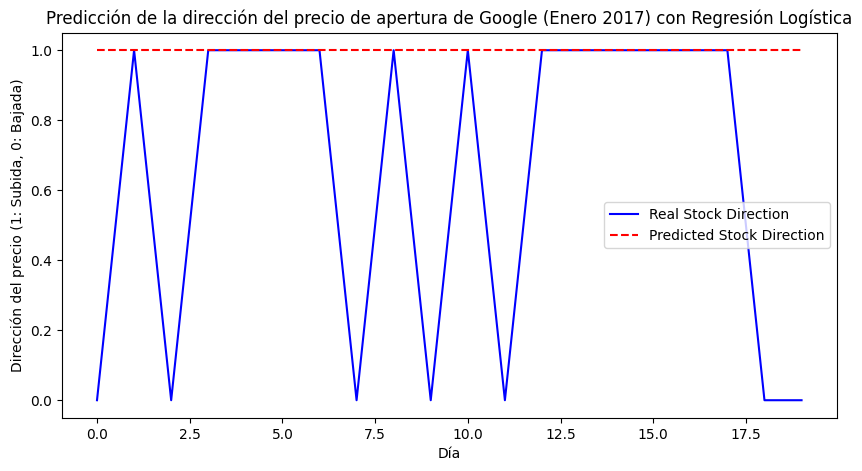

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Función para convertir los datos en columnas
def clean_and_convert(data, columns):
    for column in columns:
        if data[column].dtype == object:
            data[column] = data[column].str.replace(',', '').astype(float)
    return data

# Crear variable target para clasificación: 1 si el precio de apertura es mayor al precio de cierre del día anterior, 0 en caso contrario
datasetTraining['Target'] = (datasetTraining['Open'] > datasetTraining['Close'].shift(1)).astype(int)
datasetTraining = datasetTraining.dropna()  # Eliminar filas con valores NaN

# Establecer variables independientes y target
features = datasetTraining[['High', 'Low', 'Close', 'Volume']].values
target = datasetTraining['Target'].values

# Normalizar los datos
sc_features = MinMaxScaler(feature_range=(0, 1))
features_scaled = sc_features.fit_transform(features)

# Crear estructuras de datos con 60 pasos temporales
xTrain, yTrain = [], []
for i in range(60, len(features_scaled)):
    xTrain.append(features_scaled[i-60:i].flatten())
    yTrain.append(target[i])
xTrain, yTrain = np.array(xTrain), np.array(yTrain)

# Entrenar el modelo de regresión logística
classifier = LogisticRegression()
classifier.fit(xTrain, yTrain)

# Cargar y limpiar los datos de prueba
datasetTest = pd.read_csv('Google_Stock_Price_Test.csv')
datasetTest = clean_and_convert(datasetTest, ['High', 'Low', 'Close', 'Volume', 'Open'])

# Crear variable target para los datos de prueba (sin usar en el entrenamiento)
datasetTest['Target'] = (datasetTest['Open'] > datasetTest['Close'].shift(1)).astype(int)
datasetTest = datasetTest.dropna()  # Eliminar filas con valores NaN

# Preparar los datos de prueba
test_features = datasetTest[['High', 'Low', 'Close', 'Volume']].values
test_features_scaled = sc_features.transform(test_features)

entire_test_features = np.concatenate((features_scaled[-60:], test_features_scaled))
xTest, yTest = [], []
for i in range(60, 80):
    xTest.append(entire_test_features[i-60:i].flatten())
    yTest.append(datasetTest['Target'].values[i-60])
xTest, yTest = np.array(xTest), np.array(yTest)

# Realizar predicciones
predicted_stock_direction = classifier.predict(xTest)

# Evaluar el modelo
accuracy = accuracy_score(yTest, predicted_stock_direction)
conf_matrix = confusion_matrix(yTest, predicted_stock_direction)

# Mostrar los resultados
print("Precisión de la Regresión Logística:", accuracy)
print("Matriz de Confusión:")
print(conf_matrix)

# Visualización de las predicciones
plt.figure(figsize=(10, 5))
plt.plot(yTest, color='blue', label='Real Stock Direction')
plt.plot(predicted_stock_direction, color='red', linestyle='dashed', label='Predicted Stock Direction')
plt.title('Predicción de la dirección del precio de apertura de Google (Enero 2017) con Regresión Logística')
plt.xlabel('Día')
plt.ylabel('Dirección del precio (1: Subida, 0: Bajada)')
plt.legend()
plt.show()


La precisión del modelo que hemos obtenido es de un 65%, lo que significa que el modelo nos indica correctamente la dirección del precio de las acciones (subida o bajada) el 65% de las veces. Por otro lado, la matriz de confusión muestra que el modelo no ha clasificado correctamente ninguna bajada de , incorrectamente 7 bajadas de precio como subidas, correctamente 13 subidas de precio y no hay ninguna subida clasificada incorrectamente como bajada.

Por lo tanto, el modelo solo está prediciendo las subidas, lo que significa el comportamiento sesgado, como podemos ver tanto en la matriz como en la línea roja discontinua en la gráfica, que siempre está en 1. Al obtener estos resultados, podemos confirmar que este modelo no es correcto para el tipo de datos que tenemos y por lo tanto lo descartamos.

## **RESULTADOS**


1. *Ciclicidad*: La presencia de estos patrones cíclicos en el gráfico obtenido con el modelo de PCA, indica que hay momentos en los que los precios de las acciones tienden a seguir ciertas tendencias o comportamientos repetitivos. Aunque esto pudiera sernos útil debemos tener en cuenta que PCA no considera directamente la temporalidad de los datos, por lo que habría que complementarlo con un análisis más extendido en el tiempo.  Esta ciclicidad se puede explicar con los problemas que causan que el estudio de la predicción de las acciones sea prácticamente aleatorio.

2. *Ajuste de las gráficas*: Las visualizaciones proporcionan una representación gráfica de los precios de las acciones de Google en Enero de 2017, por tanto se miden los 20 días en los que el mercado está abierto, siendo la línea azul los valores reales y la línea roja los valores de nuestro estudio. En el caso del modelo creado por RNN, los valores se aproximan a los reales, lo cual sugiere que nuestro modelo tiene una capacidad razonable para capturar la tendencia general del precio de las acciones. Sin embargo, presenta mucha susceptibilidad a la volatilidad de los precios, es decir, no es capaz de adaptarse bien a los picos, lo cual se debe a los datos sensibles mencionados anteriormente. Con los modelos de Regresión Lineal, a pesar de existir diferencias, podemos ver que la predicción queda mejor ajustada a los valores reales, prediciendo con más acierto los picos y ajustándose con mayor precisión al máximo y al mínimo.

3. *Error cuadrático medio (MSE)*: Media aritmética de los cuadrados de los errores, donde el error es la diferencia entre el valor real y el valor predicho por el modelo.
 Con RNN Obtenemos un MSE de 66.98 (lo mínimo obtenido, aunque oscila entre ese valor y 85), sugiere que hay una ligera diferencia entre los valores predichos y los reales. En el contexto de los precios de las acciones, este error podría considerarse alto, dependiendo de la escala de precios y la volatilidad del mercado, ya que el modelo no es capaz de captar los cambios abruptos en el precio de las acciones, debido a las condiciones del mercado y la disponibilidad de datos, ya que por ejemplo el lanzamiento de nuevos productos o la aparición de nuevos competidores, son factores que nunca prodemos incluir ya que se tratan de datos sensibles.
 Para el modelo de Regresión Lineal Simple obtenemos un MSE de 61.908 y para el modelo de Regresión Lineal Múltiple un MSE de 25.43, sugiriendo que la relación entre las variables predictoras y la variable objetivo es relativamente lineal, y que la complejidad adicional de una RNN no proporciona beneficios significativos en este caso, ya que presenta la misma incapacidad de adaptación a los picos en los precios de las acciones, pero con mayor complejidad computacional.





## **CONCLUSIÓN**

La elección de los métodos para este estudio no fue aleatoria, sino que se basó en varios factores, incluyendo la complejidad de los datos, la disponibilidad de características relevantes y el rendimiento deseado del modelo. Tras haber obtenido los resultados expresados en el apartado anterior, podemos afirmar que los métodos elegidos para estudiar el comportamiento del precio de las acciones, en este caso de Google en Enero de 2017, fueron apropiados y nos permitieron generar gráficos claros que facilitaron la interpretación, además de poder respaldarnos en datos numéricos como el cálculo del error.

Para comenzar, hemos realizado el método de GSP en el cual hemos obtenido pares de resultados iguales. Sin embargo, no nos aporta información realmente relevante, pues los precios de las acciones son muy cambiantes tal y como hemos estudiado. Por lo tanto, la probabilidad de que se repitan o que se parezcan los resultados es muy alta, tanto para el precio de apertura como para el de cierre. Por otro lado, tras aplicar el algoritmo Apriori, observamos que hay cierta prevalencia en las categorías "High" y "Medium" de los precios de apertura de las acciones, pero no revelan asociaciones entre estas categorías de precios, reflejando la volatilidad de la que hablamos.

Para continuar, gracias al uso de PCA, podríamos detectar patrones como la ciclicidad, ya que sus características lo hacen muy efectivo. Si bien, dados los diversos factores que generan ruido en este tipo de datos, como se mencionó anteriormente, existen ciertas limitaciones. Por lo tanto, para que este estudio sea realmente efectivo, debería complementarse con otros modelos. Al igual, al aplicar KMeans para identificar patrones, obtenemos agrupaciones que podrían no deberse a la aletoriedad, sin embargo, dadas todas las dificultades mencionadas, es un estudio tan complejo que se hace imposible.

Por un lado, el método de Redes Neuronales Recurrentes resulta muy útil en el estudio de series temporales, ya que se adapta bien a datos no lineales, lo cual lo hace a priori un buen modelo para nuestro estudio, dado que el análisis del mercado puede ser muy complejo.

Por otro lado, el método de Regresión Lineal es más sencillo tanto de estudiar como de interpretar. Sin embargo, obtuvimos resultados sólidos, incluso más precisos que los obtenidos con RNN. Al comparar los resultados de ambos métodos, observamos que la Regresión Lineal mostró una mejor capacidad para ajustarse a los datos de precios de acciones y proporcionar información más precisa. Es decir, mientras que el modelo de RNN puede capturar la tendencia general, el modelo de Regresión Lineal demuestra una mejor capacidad para ajustarse a los datos reales y proporcionar mayor precisión, sugiriendo que los datos presentan un relación lineal.

En conclusión, hemos demostrado el potencial de las técnicas empleadas en un caso de uso extremadamente relevante. Aunque el modelo desarrollado muestra una capacidad prometedora para predecir los precios de las acciones de Google, es importante tener en cuenta sus limitaciones y considerar otros factores externos que influyen en los movimientos del mercado, y por lo tanto hacen la predicción del precio de las acciones imposible al considerarse prácticamente aleatorio. Además, este proyecto sienta las bases para investigaciones futuras en áreas como la mejora de la precisión del modelo, la incorporación de datos adicionales y la exploración de otras arquitecturas de modelos, con el objetivo final de crear un modelo que sirva de apoyo para brokers a la hora de tomar decisiones.